6 файлов с данными:


*   ВМП.csv -> df_vmp (высокотехнологичная мед помощь)
*   Назначения.csv -> df_asign
*   План.csv -> df_plan
*   Поступление.csv -> df_coming
*   Потребление.csv -> df_cons
*   Остатки.csv -> df_left









In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Назначения


*   date - Дата
*num_story	- Номер истории болезни, уникальный в пределах одного года
*name	- Номенклатура
*unit	- Единица измерения
*type	- Тип номенклатуры
*amount	- Количество
*fin_source	- Источник финансирования




In [205]:
path = '/content/gdrive/MyDrive/Colab Notebooks/project/data/Назначения.csv'
df_asign = pd.read_csv(path, encoding='utf-16', sep=';')
df_asign.head(3)

,date,num_story,name,unit,type,amount,fin_source
0,01.01.2017,537,"Ципрофлоксацин, р-р д/инф., 2 мг/мл, д/стацион...","бут. ПЭ, 100 мл",Медикаменты,10,Внебюджет
1,01.01.2017,537,Анальгин р-р для в/в и в/м введ. 500 мг/мл ам...,"амп., 2 мл",Медикаменты,5,Внебюджет
2,01.01.2017,537,"Транексам, р-р для в/в введ., 50 мг/мл, амп. с...",амп. 5 мл № 1,Медикаменты,18,Внебюджет


In [130]:
df_asign.shape

(1222121, 7)

ВМП


*   num_story	- Номер истории болезни, уникальный в пределах одного года
*date_In	- Дата поступления
*date_out	- Дата выписки
*Group_VMP	- Группа ВМП
*Method_VMP	- Метод ВМП
*MKB	- Диагноз
*fin_source	- Источник финансирования




In [206]:
path = '/content/gdrive/MyDrive/Colab Notebooks/project/data/ВМП.csv'
df_vmp = pd.read_csv(path, encoding='utf-16', sep=';')
df_vmp.head(3)

,num_story,date_In,date_out,Group_VMP,Method_VMP,MKB,fin_source
0,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС
1,6944,10.07.2017,21.07.2017,16,319,C50.4,ВМП ОМС
2,10841,07.11.2017,17.11.2017,16,319,C50.4,ВМП ОМС


In [132]:
df_vmp.shape

(12052, 7)

План

*   year - год
*   profile	- название профиля
*   Group_VMP	- Группа ВМП
*   value	- Годовой план
*   fin_source	- Источник финансирования




In [204]:
path = '/content/gdrive/MyDrive/Colab Notebooks/project/data/План.csv'
df_plan = pd.read_csv(path, encoding='utf-16', sep=';')
df_plan.head(3)

,year,profile,Group_VMP,value,fin_source
0,2017,Абдоминальная хирургия,1.0,23.0,ВМП ФБ
1,2017,Абдоминальная хирургия,2.0,7.0,ВМП ФБ
2,2017,Акушерство и гинекология,3.0,14.0,ВМП ФБ


In [134]:
df_plan.shape

(105, 5)

Поступления

*  data	- Дата
*fin_source -	Источник финансирования
*name	- Номенклатура
*unit	- Единица измерения
*amount	- Количество
*type	- тип номенклатуры


In [207]:
path = '/content/gdrive/MyDrive/Colab Notebooks/project/data/Поступление.csv'
df_coming = pd.read_csv(path, encoding='utf-16', sep=';')
df_coming.head(3)

,data,fin_source,name,unit,amount,type
0,01.01.2017,ВМП ФБ,Подгузник детский Pampers Sleep/Play №14 р.4 (...,штука,-42,Расходные материалы
1,01.01.2017,ВМП ФБ,Подгузник детский Pampers Sleep/Play №14 р.4 (...,штука,42,Расходные материалы
2,01.01.2017,ВМП ФБ,Подгузник детский Pampers Sleep/Play №30 р.1 (...,штука,-60,Расходные материалы


In [136]:
df_coming.shape

(38917, 6)

Потребление


*   data	- Дата
*fin_source	- Источник финансирования
*name	- Номенклатура
*unit	- Единица измерения
*amount	- Количество
*type	- Тип номенклатуры
*table	- Источник данных

In [208]:
path = '/content/gdrive/MyDrive/Colab Notebooks/project/data/Потребление.csv'
df_cons = pd.read_csv(path, encoding='utf-16', sep=';')
df_cons.head(3)

,data,fin_source,name,unit,amount,type,table
0,05.01.2017,Внебюджет,Эритроцитная масса,л,"0,25",Медикаменты,Склад
1,06.01.2017,Внебюджет,Эритроцитная масса,л,"0,22",Медикаменты,Склад
2,07.01.2017,Внебюджет,Эритроцитная масса,л,"0,59",Медикаменты,Склад


In [138]:
df_cons.shape

(66132, 7)

Остатки


*   date - Дата
*name	- Номенклатура
*fin_source	- Источник финансирования
*unit	- Единица измерения
*amount	- Количество
*type	- Тип номенклатуры




In [209]:
path = '/content/gdrive/MyDrive/Colab Notebooks/project/data/Остатки.csv'
df_left = pd.read_csv(path, encoding='utf-16', sep=';')
df_left.head(3)

,date,name,fin_source,unit,amount,type
0,31.01.2017,"4,0 Канюлированный винт 12/35мм ""ТДМ Ко., Лтд....",ОМС,штука,NaN,Расходные материалы
1,31.01.2017,"4,0 Канюлированный винт 16/55мм ""ТДМ Ко., Лтд....",ОМС,штука,NaN,Расходные материалы
2,31.01.2017,"4,0 Канюлированный винт 16/60мм ""ТДМ Ко., Лтд....",ОМС,штука,NaN,Расходные материалы


In [140]:
df_left.shape

(423468, 6)

In [141]:
df_left.name.unique().size

6321

### Предположение 1

* считаем остатки для каждой номенклатуры
* считаем потребление для каждой номенклатуры

потребление - остатки = предположение на след год

In [142]:
print(df_left.amount.isna().count()/df_left.size)

0.16666666666666666


всего 16% строк в таблице остатков имеют значения - мало что остается 

тяжело предсказывать количество медикаментов и дату для их заказа (возможно указывает на недостаток финансирования)

In [143]:
df_left.amount = df_left.amount.fillna(0)
df_left.date = pd.to_datetime(df_left.date)
df_left['year'] = df_left.date.apply(lambda x: x.year)
df_left['month'] = df_left.date.apply(lambda x: x.month)
df_left_2017 = df_left.loc[(df_left['year'] == 2017) & (df_left['month'] == 12) ]
df_new_left = df_left_2017.filter(['name','amount'])
df_new_left['amount'] = df_new_left.amount.apply(lambda x: str(x))
df_new_left['amount'] = df_new_left['amount'].str.replace(" ","")
df_new_left['amount'] = df_new_left['amount'].str.replace(",",".")
df_new_left['amount'] = df_new_left['amount'].astype(float, errors = 'raise')
df_left_byname2017 = df_new_left.groupby(by='name',as_index=False).sum()
df_left_byname2017.amount = df_left_byname2017.amount.fillna(0)

In [144]:
df_left_byname2017.head()

,name,amount
0,"""ВОМ"" Бумаг. крепир. парная 1000*1000 мм",0.0
1,"""ВОМ"" Бумаг. крепир. парная 1000мм*1000мм",0.0
2,"""ВОМ"" Бумаг. крепир. парная 900*900а 250 шт",0.0
3,"""ВОМ"" Бумаг. крепир. парная 900мм*900мм",0.0
4,"""ВОМ"" Бумаг. крепир. станд. бел. 900*900а 250 шт",0.0


In [145]:
df_cons.data = pd.to_datetime(df_cons.data)
df_cons['year'] = df_cons.data.apply(lambda x: x.year)
df_cons_2017 = df_cons.loc[(df_cons['year'] == 2017) ]
df_new_cons_2017 = df_cons_2017.filter(['name','amount'])
df_new_cons_2017['amount'] = df_new_cons_2017.amount.apply(lambda x: str(x))
df_new_cons_2017['amount'] = df_new_cons_2017['amount'].str.replace(" ","")
df_new_cons_2017['amount'] = df_new_cons_2017['amount'].str.replace(",",".")
df_new_cons_2017['amount'] = df_new_cons_2017['amount'].astype(float, errors = 'raise')
df_cons_byname2017 = df_new_cons_2017.groupby(by='name',as_index=False).sum()

In [146]:
df_cons_byname2017.head()

,name,amount
0,"""ВОМ"" Бумаг. крепир. парная 1000*1000 мм",7.0
1,"""ВОМ"" Бумаг. крепир. парная 900*900а 250 шт",2.0
2,"""ВОМ"" Бумаг. крепир. станд. бел. 900*900а 250 шт",1.0
3,"""ВОМ"" Бумаг. крепир. станд. голубая. 900*900а ...",1.0
4,"""ВОМ"" бум. крем. станд.(mix бел. зел.) 1200*15...",2.0


In [147]:
df_merged = pd.merge(df_cons_byname2017,df_left_byname2017, on='name')
df_merged.head()
df_predict = df_merged
df_predict = df_predict.rename(columns={"amount_x": "amount_used", "amount_y": "amount_left"})

In [148]:
df_predict.head()

,name,amount_used,amount_left
0,"""ВОМ"" Бумаг. крепир. парная 1000*1000 мм",7.0,0.0
1,"""ВОМ"" Бумаг. крепир. парная 900*900а 250 шт",2.0,0.0
2,"""ВОМ"" Бумаг. крепир. станд. бел. 900*900а 250 шт",1.0,0.0
3,"""ВОМ"" Бумаг. крепир. станд. голубая. 900*900а ...",1.0,0.0
4,"""ВОМ"" бум. крем. станд.(mix бел. зел.) 1200*15...",2.0,0.0


In [149]:
df_predict['amount_predict'] = df_predict.apply(lambda row: row.amount_used-row.amount_left, axis=1)

In [150]:
df_predict_tobuy_for2018 = df_predict.filter(['name','amount_predict'])
df_predict_tobuy_for2018.head(5)

,name,amount_predict
0,"""ВОМ"" Бумаг. крепир. парная 1000*1000 мм",7.0
1,"""ВОМ"" Бумаг. крепир. парная 900*900а 250 шт",2.0
2,"""ВОМ"" Бумаг. крепир. станд. бел. 900*900а 250 шт",1.0
3,"""ВОМ"" Бумаг. крепир. станд. голубая. 900*900а ...",1.0
4,"""ВОМ"" бум. крем. станд.(mix бел. зел.) 1200*15...",2.0


In [151]:
df_cons.data = pd.to_datetime(df_cons.data)
df_cons['year'] = df_cons.data.apply(lambda x: x.year)
df_cons_2018 = df_cons.loc[(df_cons['year'] == 2018) ]
df_new_cons_2018 = df_cons_2018.filter(['name','amount'])
df_new_cons_2018['amount'] = df_new_cons_2018.amount.apply(lambda x: str(x))
df_new_cons_2018['amount'] = df_new_cons_2018['amount'].str.replace(" ","")
df_new_cons_2018['amount'] = df_new_cons_2018['amount'].str.replace(",",".")
df_new_cons_2018['amount'] = df_new_cons_2018['amount'].astype(float, errors = 'raise')
df_cons_byname2018 = df_new_cons_2018.groupby(by='name',as_index=False).sum()

In [152]:
from sklearn.metrics import mean_absolute_error
df_cons_byname2018.head()
df_merged_res = pd.merge(df_predict_tobuy_for2018, df_cons_byname2018, on='name')
mean_absolute_error(df_merged_res.amount_predict,df_merged_res.amount)

7345.628787474332

предположение №1 отбрасывается


### Предположение 2

потребление и назначение связаны между собой

In [153]:
df_asign.date = pd.to_datetime(df_asign.date)
df_asign['year'] = df_asign.date.apply(lambda x: x.year)
df_asign_2017 = df_asign.loc[(df_asign['year'] == 2017) ]
df_new_asign_2017 = df_asign_2017.filter(['name','amount'])
df_new_asign_2017['amount'] = df_new_asign_2017.amount.apply(lambda x: str(x))
df_new_asign_2017['amount'] = df_new_asign_2017['amount'].str.replace(" ","")
df_new_asign_2017['amount'] = df_new_asign_2017['amount'].str.replace(",",".")
df_new_asign_2017['amount'] = df_new_asign_2017['amount'].astype(float, errors = 'raise')
df_asign_byname2017 = df_new_asign_2017.groupby(by='name',as_index=False).sum()

In [154]:
df_check_merged = pd.merge(df_cons_byname2017, df_asign_byname2017,on='name')
df_check_merged = df_check_merged.rename(columns={"amount_x": "amount_consumped", "amount_y": "amount_assigned"})
df_check_merged.head()

,name,amount_consumped,amount_assigned
0,038-971-025 Трубка дыхательная с манжетой низк...,91.0,1.0
1,038-971-030 Трубка дыхательная с манжетой низк...,53.0,45.0
2,038-971-035 Трубка дыхательная с манжетой низк...,37.0,35.0
3,038-971-040 Трубка дыхательная с манжетой низк...,3.0,47.0
4,038-971-045 Трубка дыхательная с манжетой низк...,6.0,34.0


In [155]:
a = df_check_merged.size
b = len(df_check_merged[(df_check_merged['amount_consumped']==df_check_merged['amount_assigned'])])
print(a,b)

2388 15


In [156]:
mean_absolute_error(df_check_merged.amount_consumped,df_check_merged.amount_assigned)

6919.4484422110545

предположение №2 отвергается




### Предположение 3

потребление = поступление - остатки

In [157]:
df_coming.data = pd.to_datetime(df_coming.data)
df_coming['year'] = df_coming.data.apply(lambda x: x.year)
df_coming_2017 = df_coming.loc[(df_coming['year'] == 2017) ]
df_new_coming_2017 = df_coming_2017.filter(['name','amount'])
df_new_coming_2017['amount'] = df_new_coming_2017.amount.apply(lambda x: str(x))
df_new_coming_2017['amount'] = df_new_coming_2017['amount'].str.replace(" ","")
df_new_coming_2017['amount'] = df_new_coming_2017['amount'].str.replace(",",".")
df_new_coming_2017['amount'] = df_new_coming_2017['amount'].astype(float, errors = 'raise')
df_coming_byname2017 = df_new_coming_2017.groupby(by='name',as_index=False).sum()

In [158]:
df_coming_byname2017.head()

,name,amount
0,"""ВОМ"" Бумаг. крепир. парная 1000*1000 мм",7.0
1,"""ВОМ"" Бумаг. крепир. парная 900*900а 250 шт",2.0
2,"""ВОМ"" Бумаг. крепир. станд. голубая. 900*900а ...",1.0
3,"""ВОМ"" бум. креп. парная1200*1200 мм",2.0
4,038-971-040 Трубка дыхательная с манжетой низк...,12.0


In [159]:
df_merged_coming_left = pd.merge(df_coming_byname2017,df_left_byname2017,on='name')
df_merged_coming_left = df_merged_coming_left.rename(columns={"amount_x": "amount_came", "amount_y": "amount_left"})
df_merged_coming_left['amount_final'] = df_merged_coming_left.apply(lambda row: row.amount_came-row.amount_left, axis=1)
df_merged_coming_left = df_merged_coming_left.filter(['name','amount_final'])
df_merged_coming_left.head()

,name,amount_final
0,"""ВОМ"" Бумаг. крепир. парная 1000*1000 мм",7.0
1,"""ВОМ"" Бумаг. крепир. парная 900*900а 250 шт",2.0
2,"""ВОМ"" Бумаг. крепир. станд. голубая. 900*900а ...",1.0
3,"""ВОМ"" бум. креп. парная1200*1200 мм",2.0
4,038-971-040 Трубка дыхательная с манжетой низк...,-92.0


In [160]:
df_merged_coming_left_to_compare = pd.merge(df_merged_coming_left,df_cons_byname2017,on='name')
df_merged_coming_left_to_compare.head()

,name,amount_final,amount
0,"""ВОМ"" Бумаг. крепир. парная 1000*1000 мм",7.0,7.0
1,"""ВОМ"" Бумаг. крепир. парная 900*900а 250 шт",2.0,2.0
2,"""ВОМ"" Бумаг. крепир. станд. голубая. 900*900а ...",1.0,1.0
3,"""ВОМ"" бум. креп. парная1200*1200 мм",2.0,2.0
4,038-971-040 Трубка дыхательная с манжетой низк...,-92.0,3.0


In [161]:
a = df_merged_coming_left_to_compare.size
b = len(df_merged_coming_left_to_compare[(df_merged_coming_left_to_compare['amount_final']==df_merged_coming_left_to_compare['amount'])])
print(a,b)

3891 368


In [162]:
mean_absolute_error(df_merged_coming_left_to_compare.amount_final,df_merged_coming_left_to_compare.amount)

21455.58351349268

предположение №3 отвергается


### Предположение 4

потребление по годам -> потребление на след год

In [163]:
df_cons_2019 = df_cons.loc[(df_cons['year'] == 2019) ]
df_new_cons_2019 = df_cons_2019.filter(['name','amount'])
df_new_cons_2019['amount'] = df_new_cons_2019.amount.apply(lambda x: str(x))
df_new_cons_2019['amount'] = df_new_cons_2019['amount'].str.replace(" ","")
df_new_cons_2019['amount'] = df_new_cons_2019['amount'].str.replace(",",".")
df_new_cons_2019['amount'] = df_new_cons_2019['amount'].astype(float, errors = 'raise')
df_cons_byname2019 = df_new_cons_2019.groupby(by='name',as_index=False).sum()

In [164]:
df_cons_2017_and_2018 = pd.merge(df_cons_byname2017, df_cons_byname2018, on='name')
df_cons_2017_and_2018 = df_cons_2017_and_2018.rename(columns={"amount_x": "amount_2017", "amount_y": "amount_2018"})

df_cons_2017_and_2018['amount_rat'] = df_cons_2017_and_2018.apply(lambda row: row.amount_2018/row.amount_2017, axis=1)
df_cons_2017_and_2018['amount_for_2019'] = df_cons_2017_and_2018.apply(lambda row: row.amount_2018*row.amount_rat, axis=1)

df_cons_predict_for_2019 = df_cons_2017_and_2018.filter(['name','amount_for_2019'])
df_cons_predict_for_2019 = pd.merge(df_cons_predict_for_2019, df_cons_byname2019, on='name')
df_cons_predict_for_2019.head()

,name,amount_for_2019,amount
0,032-10-003 Распылитель (небулайзер),1.666667,5.0
1,91-4290 Система имплантируемая инфузионная Med...,0.166667,3.0
2,9102905 SCOPEVALET Endo Bag & Tag (вкладыш тро...,4563.333333,1000.0
3,"ABL80 Basic блок растворов, арт.944-309",10.285714,11.0
4,ABL800 Калибровочный газ 2 (34 bar),2.000000,2.0


In [165]:
mean_absolute_error(df_cons_predict_for_2019.amount_for_2019,df_cons_predict_for_2019.amount)

27364.391816068863

гипотеза №4 отвергается

In [166]:
df_asign['num_story'] = df_asign.num_story.apply(lambda x: str(x))
df_vmp['num_story'] = df_vmp.num_story.apply(lambda x: str(x))
df_supermain = pd.merge(df_vmp,df_asign,on='num_story')
df_supermain['amount'] = df_supermain.amount.apply(lambda x: str(x))
df_supermain['amount'] = df_supermain['amount'].str.replace(" ","")
df_supermain['amount'] = df_supermain['amount'].str.replace(",",".")
df_supermain['amount'] = df_supermain['amount'].astype(float, errors = 'raise')
df_supermain['name'] = df_supermain.name.apply(lambda x: str(x))


In [167]:
df_supermain_2017 = df_supermain.loc[(df_supermain['year'] == 2017) ]
df_supermain_2017 = df_supermain_2017.filter(['MKB','name', 'amount'])
df_names_for_mkb = df_supermain_2017.groupby(by=['MKB','name'],as_index=False).sum()

In [168]:
#количество лекарств для каждого диагноза
df_names_for_mkb.head()

,MKB,name,amount
0,A15,19 FR круглый цельный BLAKE Drain 10 шт/уп 2230,1.0
1,A15,"Endobag пакет экстракционный, рабочий объем 20...",1.0
2,A15,Аксессуары д/электрохирургии ручка-держатель(к...,1.0
3,A15,"Аксетин, пор. д/р-ра для в/в и в/м введ., 1,5 ...",3.0
4,A15,Амбробене р-р д/ин. 15 мг амп. 2 мл №5 Меркле,2.0


In [169]:
df_supermain['month'] = df_supermain.date.apply(lambda x: x.month)
df_supermain.head()

,num_story,date_In,date_out,Group_VMP,Method_VMP,MKB,fin_source_x,date,name,unit,type,amount,fin_source_y,year,month
0,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС,2017-04-18,"Кеторолак, р-р для в/в и в/м введ., 30 мг/мл, ...",амп. 1 мл,Медикаменты,15.0,ОМС,2017,4
1,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС,2017-04-18,"Дицинон, р-р для в/в и в/м введ., 125 мг/мл, а...","амп., 2 мл",Медикаменты,1.0,ОМС,2017,4
2,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС,2017-04-18,"Натрия хлорид, р-р д/инф., 0,9 %, бут. ПЭ, 500...","бут. ПЭ, 500 мл",Медикаменты,24.0,ОМС,2017,4
3,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС,2017-04-18,Феназепам таб. 1 мг №50 Валента Фармацевтика,табл.,Медикаменты,1.0,ОМС,2017,4
4,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС,2017-04-18,"Лидокаин буфус, р-р д/ин., 2 %, амп. пластик.,...","амп. пластик., 2мл",Медикаменты,24.0,ОМС,2017,4


In [170]:
df_supermain['month_from_start'] = df_supermain.apply(lambda row: (row.year - 2017)*12 + row.month, axis= 1)
df_supermain.head()

,num_story,date_In,date_out,Group_VMP,Method_VMP,MKB,fin_source_x,date,name,unit,type,amount,fin_source_y,year,month,month_from_start
0,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС,2017-04-18,"Кеторолак, р-р для в/в и в/м введ., 30 мг/мл, ...",амп. 1 мл,Медикаменты,15.0,ОМС,2017,4,4
1,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС,2017-04-18,"Дицинон, р-р для в/в и в/м введ., 125 мг/мл, а...","амп., 2 мл",Медикаменты,1.0,ОМС,2017,4,4
2,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС,2017-04-18,"Натрия хлорид, р-р д/инф., 0,9 %, бут. ПЭ, 500...","бут. ПЭ, 500 мл",Медикаменты,24.0,ОМС,2017,4,4
3,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС,2017-04-18,Феназепам таб. 1 мг №50 Валента Фармацевтика,табл.,Медикаменты,1.0,ОМС,2017,4,4
4,3778,18.04.2017,25.04.2017,16,319,C50.4,ВМП ОМС,2017-04-18,"Лидокаин буфус, р-р д/ин., 2 %, амп. пластик.,...","амп. пластик., 2мл",Медикаменты,24.0,ОМС,2017,4,4


In [171]:
# количество диагнозов по месяцам (графика нет потому что мало показывает изза большого количества диагнозов)
# тяжело предсказывать редкие болезни (см. таблицу ниже, на А15 хорошо видно)
df_for_visual = df_supermain.filter(['MKB','month_from_start'])
df_for_visual = df_for_visual.groupby(by=['MKB','month_from_start']).size().reset_index(name = 'num')
df_for_visual.head()

,MKB,month_from_start,num
0,A15,3,56
1,A15,15,72
2,A15,25,1
3,C03,1,17
4,C03,3,14


In [172]:
# Отфильтруем самые популярные диагнозы( num > 500 )

df_for_visual2 = df_supermain.filter(['MKB','month_from_start'])
df_for_visual2['MKB'] = df_for_visual2.MKB.apply(lambda x: str(x))
df_for_visual2 = df_for_visual2.groupby(by=['MKB']).size().reset_index(name = 'num')
df_for_visual2 = df_for_visual2.loc[(df_for_visual2['num'] > 500) ]

In [173]:
df_for_visual2.sort_values(by=['num'], ascending=False)

,MKB,num
167,I20.8,160794
261,M45,110947
264,M48.0,73998
239,M17,63919
166,I20.0,58726
...,...,...
303,N81.0,526
324,Q38.5,518
163,I05.1,512
30,C24,503


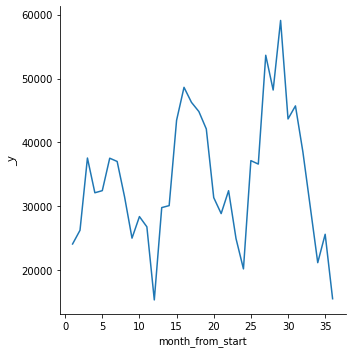

In [174]:
# график болезней по месяцам (больше всего болезней летом, цикличность по годам)
import seaborn as sns


df_for_visual3 = df_supermain.filter(['MKB','month_from_start'])
df_for_visual3 = df_for_visual3.groupby(by=['month_from_start']).size()
sns.relplot(data = df_for_visual3, kind='line',palette='Paired')

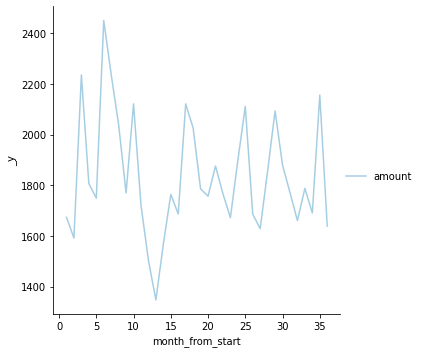

In [175]:
# график поставок по месяцам
df_cons_for_visual = df_cons
df_cons_for_visual.head()
df_cons_for_visual['month'] = df_cons_for_visual.data.apply(lambda x: x.month)
df_cons_for_visual['month_from_start'] = df_cons_for_visual.apply(lambda row: (row.year - 2017)*12 + row.month, axis= 1)
df_cons_for_visual = df_cons_for_visual.filter(['month_from_start','amount'])
df_cons_for_visual = df_cons_for_visual.groupby(by=['month_from_start']).count()
sns.relplot(data = df_cons_for_visual, kind='line',palette='Paired')

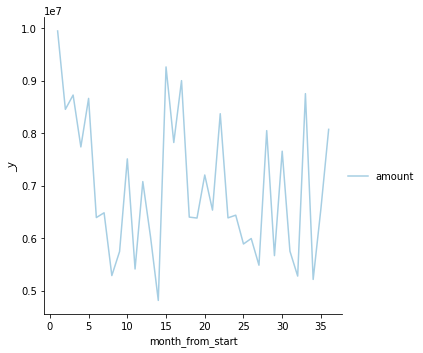

In [176]:
# график остатков по месяцам
df_left_for_visual = df_left
df_left_for_visual.head()
df_left_for_visual['amount'] = df_left_for_visual.amount.apply(lambda x: str(x))
df_left_for_visual['amount'] = df_left_for_visual['amount'].str.replace(" ","")
df_left_for_visual['amount'] = df_left_for_visual['amount'].str.replace(",",".")
df_left_for_visual['amount'] = df_left_for_visual['amount'].astype(float, errors = 'raise')
df_cons_for_visual['month'] = df_left_for_visual.date.apply(lambda x: x.month)
df_left_for_visual['month_from_start'] = df_left_for_visual.apply(lambda row: (row.year - 2017)*12 + row.month, axis= 1)
df_left_for_visual = df_left_for_visual.filter(['month_from_start','amount'])
df_left_for_visual.head()
df_left_for_visual = df_left_for_visual.groupby(by=['month_from_start']).sum()
sns.relplot(data = df_left_for_visual, kind='line',palette='Paired')

In [177]:
# количество диагнозов по годам
df_for_not_visual = df_supermain.filter(['MKB','year'])
df_for_not_visual = df_for_not_visual.groupby(by=['year','MKB']).size().reset_index(name = 'num')
df_for_not_visual.head()

,year,MKB,num
0,2017,A15,56
1,2017,C03,189
2,2017,C04,162
3,2017,C06.0,32
4,2017,C15,176


In [178]:
df_names_for_mkb.head()

,MKB,name,amount
0,A15,19 FR круглый цельный BLAKE Drain 10 шт/уп 2230,1.0
1,A15,"Endobag пакет экстракционный, рабочий объем 20...",1.0
2,A15,Аксессуары д/электрохирургии ручка-держатель(к...,1.0
3,A15,"Аксетин, пор. д/р-ра для в/в и в/м введ., 1,5 ...",3.0
4,A15,Амбробене р-р д/ин. 15 мг амп. 2 мл №5 Меркле,2.0


In [179]:
df_for_not_visual_2017 = df_for_not_visual.loc[(df_for_not_visual['year'] == 2017) ]
df_for_not_visual_2017 = df_for_not_visual_2017.filter(['MKB','num'])
df_for_not_visual_2017.head()

,MKB,num
0,A15,56
1,C03,189
2,C04,162
3,C06.0,32
4,C15,176


In [180]:
# использовано номенклатур в 2017 по диагнозам (можно использовать после предсказания диагнозов)
df_needs_by_diag_2017 = pd.merge(df_names_for_mkb,df_for_not_visual_2017, on='MKB')
df_needs_by_diag_2017['used_amount'] = df_needs_by_diag_2017.apply(lambda row: row.amount*row.num, axis= 1)
df_needs_by_diag_2017 = df_needs_by_diag_2017.filter(['MKB','name','used_amount'])
df_needs_by_diag_2017.head()

,MKB,name,used_amount
0,A15,19 FR круглый цельный BLAKE Drain 10 шт/уп 2230,56.0
1,A15,"Endobag пакет экстракционный, рабочий объем 20...",56.0
2,A15,Аксессуары д/электрохирургии ручка-держатель(к...,56.0
3,A15,"Аксетин, пор. д/р-ра для в/в и в/м введ., 1,5 ...",168.0
4,A15,Амбробене р-р д/ин. 15 мг амп. 2 мл №5 Меркле,112.0


### Выводы

непонятно как связаны таблицы (потребление медикаментов не зависит от ни от их назначения, ни от анализа поступления и остатков)

потребление медикаментов зависит от количества болезней

имеет смысл предсказывать количество медикаментов на год (изза цикличности болезей график выше)

тогда тяжело вводить любой алгоритм маш.обуч. потому что данные всего по 3 годам

болезни тяжело прогнозировать (для редких болезней - мало данных, для частых - часто происходят всплески заболеваний)




# Обучение моделей

попробуем обучить модели, используя


*   XGBoost
*   Ridge



In [181]:
df_supermain.columns

Index(['num_story', 'date_In', 'date_out', 'Group_VMP', 'Method_VMP', 'MKB',
       'fin_source_x', 'date', 'name', 'unit', 'type', 'amount',
       'fin_source_y', 'year', 'month', 'month_from_start'],
      dtype='object')

In [182]:
df_supermain['yearday'] = df_supermain.date.apply(lambda x: x.timetuple().tm_yday)

In [183]:
df_supermain = df_supermain.filter(['Group_VMP', 'Method_VMP', 'MKB', 'name', 'amount', 'fin_source_y', 'year', 'month', 'yearday'])

In [184]:
df_supermain.head()

,Group_VMP,Method_VMP,MKB,name,amount,fin_source_y,year,month,yearday
0,16,319,C50.4,"Кеторолак, р-р для в/в и в/м введ., 30 мг/мл, ...",15.0,ОМС,2017,4,108
1,16,319,C50.4,"Дицинон, р-р для в/в и в/м введ., 125 мг/мл, а...",1.0,ОМС,2017,4,108
2,16,319,C50.4,"Натрия хлорид, р-р д/инф., 0,9 %, бут. ПЭ, 500...",24.0,ОМС,2017,4,108
3,16,319,C50.4,Феназепам таб. 1 мг №50 Валента Фармацевтика,1.0,ОМС,2017,4,108
4,16,319,C50.4,"Лидокаин буфус, р-р д/ин., 2 %, амп. пластик.,...",24.0,ОМС,2017,4,108


In [186]:
# One-hot для источников финансирования
fin_source_y = pd.get_dummies(df_supermain['fin_source_y'])
df_supermain = df_supermain.join(fin_source_y)
df_supermain.head()

,Group_VMP,Method_VMP,MKB,name,amount,fin_source_y,year,month,yearday,ВМП ФБ,Внебюджет,ОМС,По договору пожертвования
0,16,319,C50.4,"Кеторолак, р-р для в/в и в/м введ., 30 мг/мл, ...",15.0,ОМС,2017,4,108,0,0,1,0
1,16,319,C50.4,"Дицинон, р-р для в/в и в/м введ., 125 мг/мл, а...",1.0,ОМС,2017,4,108,0,0,1,0
2,16,319,C50.4,"Натрия хлорид, р-р д/инф., 0,9 %, бут. ПЭ, 500...",24.0,ОМС,2017,4,108,0,0,1,0
3,16,319,C50.4,Феназепам таб. 1 мг №50 Валента Фармацевтика,1.0,ОМС,2017,4,108,0,0,1,0
4,16,319,C50.4,"Лидокаин буфус, р-р д/ин., 2 %, амп. пластик.,...",24.0,ОМС,2017,4,108,0,0,1,0


In [187]:
df_supermain = df_supermain.drop('fin_source_y', axis=1)
df_supermain.columns

Index(['Group_VMP', 'Method_VMP', 'MKB', 'name', 'amount', 'year', 'month',
       'yearday', 'ВМП ФБ', 'Внебюджет', 'ОМС', 'По договору пожертвования'],
      dtype='object')

In [190]:
# Создадим словарь для номенклатур
arr = df_supermain.name.unique()
dic = {}
k = 0

for i in arr:
  dic[i] = k
  k += 1

In [189]:
df_supermain.name = df_supermain.name.apply(lambda x: dic[x])

In [191]:
df_supermain.tail()

,Group_VMP,Method_VMP,MKB,name,amount,year,month,yearday,ВМП ФБ,Внебюджет,ОМС,По договору пожертвования
1232530,65,2608,D11.0,124,2.0,2019,2,38,1,0,0,0
1232531,65,2608,D11.0,1079,1.0,2019,2,38,1,0,0,0
1232532,65,2608,D11.0,16,1.0,2019,2,38,1,0,0,0
1232533,65,2608,D11.0,107,1.0,2019,2,38,1,0,0,0
1232534,65,2608,D11.0,990,2.0,2019,2,38,1,0,0,0


In [192]:
# Словарь для МКБ
dic_MKB = {}
count = 0

for x in df_supermain.MKB.unique():
  dic_MKB.update({x : count})
  count += 1

In [193]:
df_supermain.MKB = df_supermain.MKB.apply(lambda x: dic_MKB[x])

In [194]:
df_supermain.head()

,Group_VMP,Method_VMP,MKB,name,amount,year,month,yearday,ВМП ФБ,Внебюджет,ОМС,По договору пожертвования
0,16,319,0,0,15.0,2017,4,108,0,0,1,0
1,16,319,0,1,1.0,2017,4,108,0,0,1,0
2,16,319,0,2,24.0,2017,4,108,0,0,1,0
3,16,319,0,3,1.0,2017,4,108,0,0,1,0
4,16,319,0,4,24.0,2017,4,108,0,0,1,0


In [196]:
df_supermain.isna().sum()

Group_VMP                       0
Method_VMP                      0
MKB                             0
name                            0
amount                       1298
year                            0
month                           0
yearday                         0
ВМП ФБ                          0
Внебюджет                       0
ОМС                             0
По договору пожертвования       0
dtype: int64

In [197]:
df_supermain = df_supermain.dropna()
df_supermain.isna().sum()

Group_VMP                    0
Method_VMP                   0
MKB                          0
name                         0
amount                       0
year                         0
month                        0
yearday                      0
ВМП ФБ                       0
Внебюджет                    0
ОМС                          0
По договору пожертвования    0
dtype: int64

### XGBoost

целевая переменная - amount (количество заболеваний)

In [195]:
from xgboost import XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [198]:
X = df_supermain.drop('amount', axis=1)
y = df_supermain.amount

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [199]:
X_train_id = X_train.name
X_train = X_train.drop('name',axis=1)
X_test_id = X_test.name
X_test = X_test.drop('name',axis=1)

In [200]:
xgbrf = XGBRFRegressor()
xgbrf.fit(X_train, y_train)
mean_absolute_error(y_test, xgbrf.predict(X_test))

[08:18:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3.018499923653868

### Ridge

In [201]:
from sklearn.linear_model import Ridge

In [202]:
ridge = Ridge(alpha=1000).fit(X_train, y_train)
mean_absolute_error(ridge.predict(X_test), y_test)

3.019292718164309

Значение mean_absolute_error большое, что говорит о том, что модели нуждаются в доработке.